# Library Setup

In [1]:
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Data Import and Graph Creation

In [2]:
edges_df = pd.read_csv('../data/gephi-edge-list.csv')
nodes_df = pd.read_csv('../data/gephi-node-list.csv')

G = nx.Graph() 

# Add nodes
for _, row in nodes_df.iterrows():
    node_id = row['ID']
    attributes = row.drop('ID').to_dict()
    G.add_node(node_id, **attributes)

# Add the edges
for _, row in edges_df.iterrows():
    source = row['Source']
    target = row['Target']
    edge_attrs = row.drop(['Source', 'Target']).to_dict()
    G.add_edge(source, target, **edge_attrs)    

# Basic Statistics
Not sure exactly what direction this has to go at this point in time

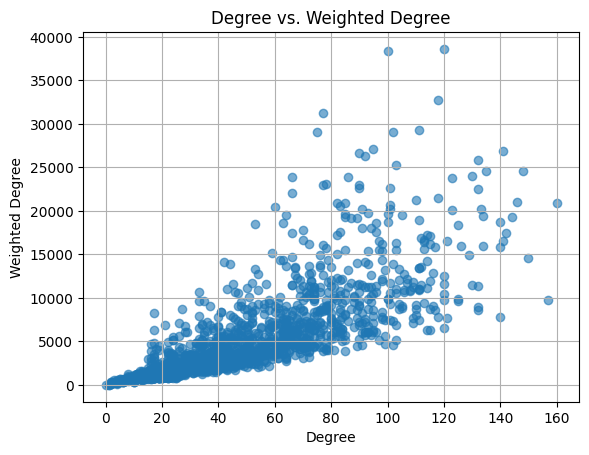

In [3]:
# Compute degree and weighted degree for each node
df = pd.DataFrame({
    'degree': dict(G.degree()),
    'weighted_degree': dict(G.degree(weight='Weight'))
})

# Calculate Spearman correlation using pandas
correlation = df.corr(method='spearman')


plt.scatter(df['degree'], df['weighted_degree'], alpha=0.6)
plt.xlabel('Degree')
plt.ylabel('Weighted Degree')
plt.title('Degree vs. Weighted Degree')
plt.grid(True)
plt.show()